In [41]:
# Per una visualizzazione migliore, usare Jupyterlab

# PROGETTO DATA SCIENCE 

### Sebastiano Fabbri

#   <center><b> CHI PRODUCE IL CIBO CHE MANGIAMO?</b>

## <strong><span style="color:LightSeaGreen">DISCOVERY</span></strong>

Secondo recenti studi, la popolazione mondiale crescerà dai 7,9 miliardi di oggi a 9,7 miliardi nell'anno 2050. Uno dei problemi che bisogna affrontare per gestire questa crescita è la produzione di cibo. Bisogna trovare un modo per produrre cibo per tutta
la popolazione senza compromettere l'ambiente terrestre.

Il cambiamento climatico è ormai evidente. Le temperature medie più calde e gli eventi metereologici sempre più estemi ne sono la prova.

Tutti questi fattori vanno presi in considerazione per impostare una strategia a lungo termine per produrre cibo in maniera sostenibile. Ma potrebbe non bastare. 

Gli alimenti di origine animale sono tra le principali cause del riscaldamento globale. È necessario anche un cambiamento nel regime alimentare della popolazione.

 Con questa analisi cercheremo di rispondere a queste domande:
 - Qual è il trend mondiale di produzione di alimenti
 - Quali sono gli stati che producono di più
 - Qual è l'alimento che contribuisce maggiormente al riscaldamento climatico                                           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

%matplotlib inline

---

## <strong><span style="color:LightSeaGreen">DATA SELECTION</span></strong>

I dati utilizzati per l'analisi sono:
 - Worldwide food\feed production and distribution, 1961-2013. Dataset fornito dalla FAO, contenente dati della produzione mondiale di alimenti dal 1961 al 2013. <br><a href="https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production">Who eats the food we grow?</a> <br>
<br>
 
 - Environment Impact of Food Production. Dataset fornito da ourworldindata.com contenente gli alimenti più coltivati con i rispettivi valori di inquinamento e risorse utilizzate. <br> <a href="https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production">Environment Impact of Food Production</a>

In [2]:
df_FAO = pd.read_csv('./data/FAO.csv', encoding = "ISO-8859-1")

---

## <strong><span style="color:LightSeaGreen">DATA EXPLORATION</span></strong>

Iniziamo con una analisi generale dei dati per capire come sono composti i dataset

#### DATASET FAO

In [3]:
df_FAO.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


>Controlliamo di quante linee e colonne è composto 

In [4]:
df_FAO.shape

(21477, 63)

>Analisi statistica descrittiva per controllare la distribuzione e la presenza di dati anomali.

>Negli anni 2012 e 2013 abbiamo dei valori minimi negativi. Più avanti andremo a controllare a chi appartengono

In [5]:
df_FAO.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,18062.000000,18062.000000,20490.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,225.988962,230.419222,238.415487,244.340952,250.262237,254.238655,257.454677,267.323336,267.126547,274.443528,276.573364,285.963095,299.790166,305.835099,305.666072,311.656428,320.981157,326.911473,339.557866,344.345468,351.743227,361.941800,363.976363,372.351656,375.418115,379.449950,386.007760,389.309370,397.079607,404.490822,415.261922,421.623053,428.878505,441.677019,451.771819,458.723826,465.458964,472.693298,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,2100.228354,2132.244717,2189.166883,2266.964627,2322.967733,2372.627182,2421.964322,2528.042608,2365.411987,2464.376834,2427.373749,2555.249955,2757.473984,2768.374398,2730.433908,2774.265032,2931.209478,3002.929914,3101.632149,3094.241689,3231.480597,3312.098595,3236.741120,3349.602911,3422.824069,3453.922037,3509.290447,3555.648726,3714.324984,3754.281929,3962.388448,4036.101905,4149.057052,4340.531660,4649.579544,4751.597094,4868.625666,4911.216237,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6

>Utilizzando un grafico heatmap, visualizziamo la presenza di valori mancanti.<br>
>Alcuni dati sembrano partire e finire nello stesso punto, mentre le linee più lunge indicano dati mancanti in molte colonne del dataset.

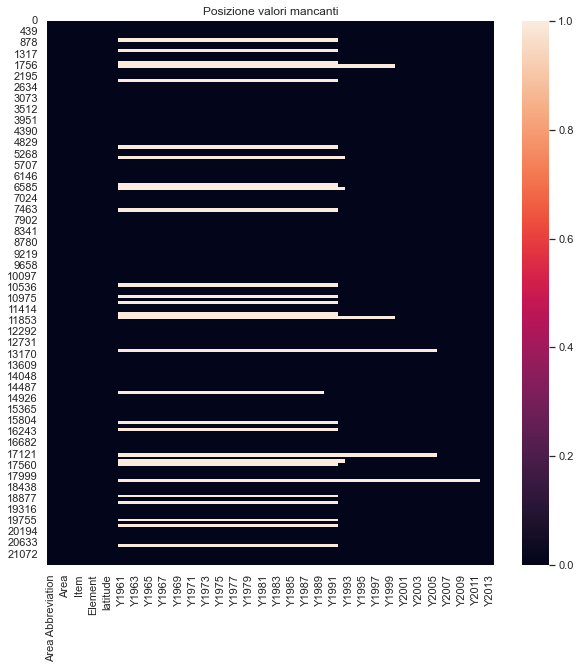

In [6]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(df_FAO.isnull()).set(title='Posizione valori mancanti')

plt.show()

#### DATASET ourworldindata.com

In [7]:
df_common_product = pd.read_csv('./data/Food_Production.csv')
df_common_product.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


>Controlliamo la percentuale di dati mancanti

In [8]:
miss_val = (df_common_product.isnull().sum()/df_common_product.shape[0]*100).round(2)
miss_val

Food product                                                                0.00
Land use change                                                             0.00
Animal Feed                                                                 0.00
Farm                                                                        0.00
Processing                                                                  0.00
Transport                                                                   0.00
Packging                                                                    0.00
Retail                                                                      0.00
Total_emissions                                                             0.00
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   23.26
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.63
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      37.21
Freshwater withdrawals per 1

---

## <strong><span style="color:LightSeaGreen">DATA CLEANING</span></strong>

#### DATASET FAO

>Dal grafico heatmap notiamo che molti vaori iniziano a mancare dal 1961.

In [9]:
miss_state = df_FAO[df_FAO['Y1961'].isnull()]
print(miss_state['Area'].unique())

['Armenia' 'Azerbaijan' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Croatia' 'Czechia' 'Estonia' 'Ethiopia' 'Georgia' 'Kazakhstan'
 'Kyrgyzstan' 'Latvia' 'Lithuania' 'Luxembourg' 'Montenegro' 'Oman'
 'Republic of Moldova' 'Russian Federation' 'Serbia' 'Slovakia' 'Slovenia'
 'Sudan' 'Tajikistan' 'The former Yugoslav Republic of Macedonia'
 'Turkmenistan' 'Ukraine' 'Uzbekistan']


>Belgio e Lussemburgo abbiamo valori a partire dal 2000.<br>
>Serbia e Montenegro dal 2006.<br>
>Mentre per il Sudan abbiamo valori solo degli anno 2012 - 2013.<br>
>Questi dati possiamo eliminarli.<br>

>Oman inizia dal 1990.<br>
>Gli altri stati sono membri dell'ex URSS e fino al 1991 non abbiamo valori, così come Federazione Russa parte dal 1992. Questi dati sono parzialmente completi e decidiamo di mantenerli nel dataset.

In [10]:
df_FAO = df_FAO[(df_FAO.Area != 'Sudan') &
                (df_FAO.Area != 'Serbia') &
                (df_FAO.Area != 'Montenegro') &
                (df_FAO.Area != 'Belgium') &
                (df_FAO.Area != 'Luxembourg')]

>Alcune colonne non sono utili per le nostre analisi, quindi le eliminiamo

In [11]:
df_FAO.drop(['Area Abbreviation',
             'Area Code',
             'Item Code',
             'Element Code',
             'Unit',
             'latitude',
             'longitude'], axis=1, inplace=True)

>Controlliamo i valori minimi negativi nelle colonne 2012 e 2013

In [12]:
search_value = df_FAO[(df_FAO['Y2012'] == -169.000000) &
                      (df_FAO['Y2013'] == -246.000000)]
search_value

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
10082,Japan,Oats,Food,0.0,0.0,2.0,9.0,5.0,1.0,12.0,5.0,17.0,16.0,29.0,21.0,28.0,9.0,12.0,21.0,16.0,7.0,30.0,14.0,10.0,9.0,10.0,5.0,6.0,8.0,9.0,13.0,15.0,13.0,11.0,11.0,12.0,18.0,17.0,44.0,17.0,21.0,21.0,22.0,24.0,31.0,35.0,44.0,44.0,42.0,47.0,46.0,47.0,47.0,51.0,-169,-246


Non avendo dati con cui sostituire i valori, eliminiamo la linea intera

In [13]:
df_FAO = df_FAO.drop(index=10082)

---

#### DATASET ourworldindata.com

>Dividiamo questo dataset in 2 sub set e procediamo con la rimozione dei dati non utili

In [14]:
food_cycle = df_common_product[['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
                                'Transport', 'Packging', 'Retail', 'Total_emissions']]

>Nel secondo sub set teniamo solo le colonne con meno dati mancanti

In [15]:
product_pollution = df_common_product[[ 'Food product',
                                        'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
                                        'Freshwater withdrawals per kilogram (liters per kilogram)',
                                        'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
                                        'Land use per kilogram (m² per kilogram)',
                                        'Scarcity-weighted water use per kilogram (liters per kilogram)']]

>Puliamo il sub set

In [16]:
product_pollution.dropna(axis=0, inplace=True)

---

## <strong><span style="color:LightSeaGreen">DATA TRANSFORMATION</span></strong>

#### DATASET FAO

>Controlliamo il type dei dati.

In [18]:
df_FAO.dtypes

Area        object
Item        object
Element     object
Y1961      float64
Y1962      float64
Y1963      float64
Y1964      float64
Y1965      float64
Y1966      float64
Y1967      float64
Y1968      float64
Y1969      float64
Y1970      float64
Y1971      float64
Y1972      float64
Y1973      float64
Y1974      float64
Y1975      float64
Y1976      float64
Y1977      float64
Y1978      float64
Y1979      float64
Y1980      float64
Y1981      float64
Y1982      float64
Y1983      float64
Y1984      float64
Y1985      float64
Y1986      float64
Y1987      float64
Y1988      float64
Y1989      float64
Y1990      float64
Y1991      float64
Y1992      float64
Y1993      float64
Y1994      float64
Y1995      float64
Y1996      float64
Y1997      float64
Y1998      float64
Y1999      float64
Y2000      float64
Y2001      float64
Y2002      float64
Y2003      float64
Y2004      float64
Y2005      float64
Y2006      float64
Y2007      float64
Y2008      float64
Y2009      float64
Y2010      f

>Le ultime 2 colonne sono diverse rispetto alle altre. Rendiamo tutto uniforme.

In [19]:
df_FAO.Y2012 = df_FAO.Y2012.astype(float)
df_FAO.Y2013 = df_FAO.Y2013.astype(float)

#### DATASET ourworldindata.com

>Arrotondiamo i valori dei dati

In [20]:
product_pollution[product_pollution.columns[1:]] = product_pollution[product_pollution.columns[1:]].round(1)

>Cambiamo nome alle colonne per semplicità

In [21]:
product_pollution = product_pollution.rename({"Eutrophying emissions per kilogram (gPO₄eq per kilogram)":"Eutro_per_kg",
                                              "Freshwater withdrawals per kilogram (liters per kilogram)":"Freshwater_per_kg",
                                              "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)":"G_Gas_per_1000kcal",
                                              "Land use per kilogram (m² per kilogram)":"Land_per_kg",
                                              "Scarcity-weighted water use per kilogram (liters per kilogram)":"Scarcity_water_per_kg"}, axis='columns')

>Aggiungiamo una colonna con il tipo di alimento (Vegetale o animale)

In [22]:
food_cycle = food_cycle.assign(Type=['vegetable','vegetable','vegetable','vegetable','vegetable','vegetable','vegetable',
                                     'vegetable','vegetable','vegetable','vegetable','vegetable','vegetable','vegetable',
                                     'vegetable','vegetable','vegetable','vegetable','vegetable','vegetable','vegetable',
                                     'vegetable','vegetable','vegetable','vegetable','vegetable','vegetable','vegetable',
                                     'vegetable','vegetable','vegetable','vegetable','vegetable','animal','animal','animal',
                                     'animal','animal','animal','animal','animal','animal','animal',])

---

## <strong><span style="color:LightSeaGreen">DATA VISUALIZATION</span></strong>

>Vediamo ora, tramite visualizzazioni grafiche, i top 5 produttori di alimenti

In [23]:
year_time = list(df_FAO.columns[3:])

In [24]:
range_num = []
for n in range(174):
    range_num.append(n)

In [25]:
sum_year = df_FAO.groupby(['Area'])[year_time].sum().reset_index()

In [26]:
# troviamo quali sono i 5 maggiori produttori dell 2013 e analizziamo il loro andamento nel corso del tempo

top_5 = sum_year.groupby(["Area"])['Y2013'].sum().sort_values(ascending=False)
top_5.head()

Area
China, mainland             3191155.0
India                       1336593.0
United States of America     938639.0
Brazil                       439967.0
Russian Federation           370913.0
Name: Y2013, dtype: float64

In [27]:
# creo df con i dati dei top 5 produttori
top_5 = sum_year[(sum_year['Area'] == 'China, mainland') |
                 (sum_year['Area'] == 'India') |
                 (sum_year['Area'] == 'United States of America') |
                 (sum_year['Area'] == 'Brazil') |
                 (sum_year['Area'] == 'Russian Federation')]

In [28]:
# aggiungo colonna per cambiare il formato del df
top_5 = top_5.assign(id=[0,1,2,3,4])

In [29]:
# cambio il formato del nuovo dataset per creare un grafico a linee con seaborn 

top_5 = pd.wide_to_long(top_5,['Y'], i ='id', j='year')

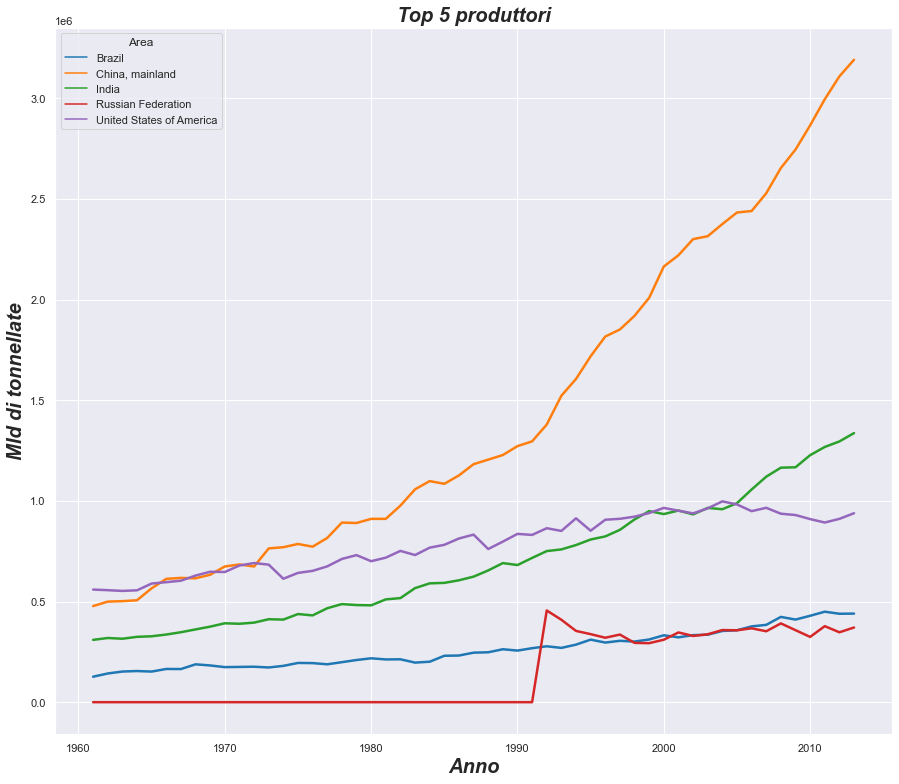

In [30]:
sns.set(rc={"figure.figsize":(15, 13)})
sns.lineplot(data=top_5, x='year', y='Y', hue='Area', palette="tab10", linewidth=2.5)

plt.title('Top 5 produttori', size=20, fontstyle='italic', weight=900)
plt.xlabel('Anno', size=20, fontstyle='italic', weight=900)
plt.ylabel('Mld di tonnellate', size=20, fontstyle='italic', weight=900)

plt.show()

>Cina e India producono sempre più cibo.<br>
>Vediamo ora quali sono i prodotti che inquinano di più

In [31]:
food_type = food_cycle.groupby(['Type'])['Total_emissions'].sum().reset_index()

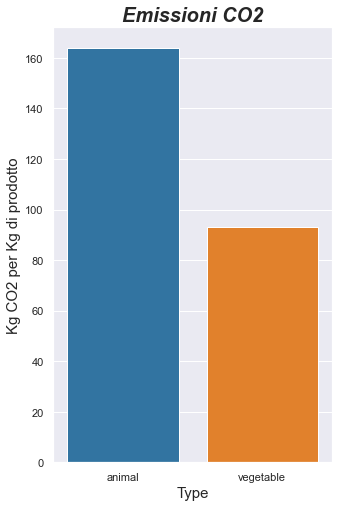

In [32]:
data = food_type
sns.set(rc={"figure.figsize":(5, 8)})

ax = sns.barplot(x="Type", y="Total_emissions", data=data, palette="tab10")

plt.title('Emissioni CO2', size=20, fontstyle='italic', weight=900)
plt.ylabel('Kg CO2 per Kg di prodotto', size=15)
plt.xlabel('Type', size=15)

plt.show()

>Quale passaggio del ciclo di produzione inquina di più

In [33]:
# somma totale di ogni ciclo di produzione 
data = {'Cycle':[], 'total':[]}

for c in food_cycle.columns[1:8]:
    x = food_cycle[c].sum().round(2)
    data['Cycle'].append(c)
    data['total'].append(x)

total_cicle_emission = pd.DataFrame(data)

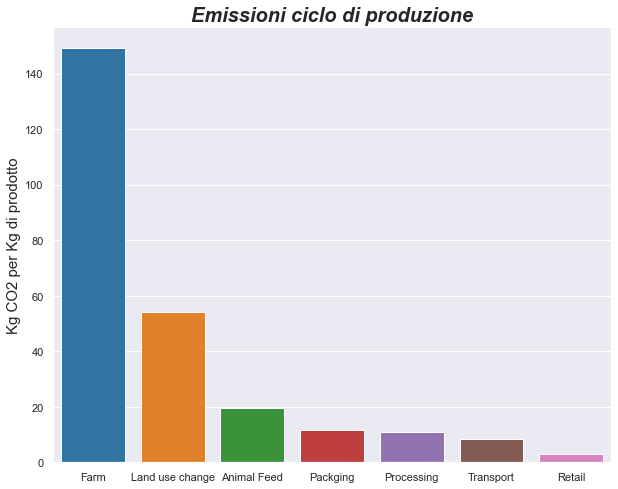

In [34]:
data = total_cicle_emission
sns.set(rc={"figure.figsize":(10, 8)})
ax = sns.barplot(x="Cycle", y="total", data=data, palette="tab10", order=data.sort_values('total', ascending=False).Cycle)

plt.title('Emissioni ciclo di produzione', size=20, fontstyle='italic', weight=900)
plt.ylabel('Kg CO2 per Kg di prodotto', size=15)
plt.xlabel('')

plt.show()

>Quale tipo di prodotto inquina maggiormente

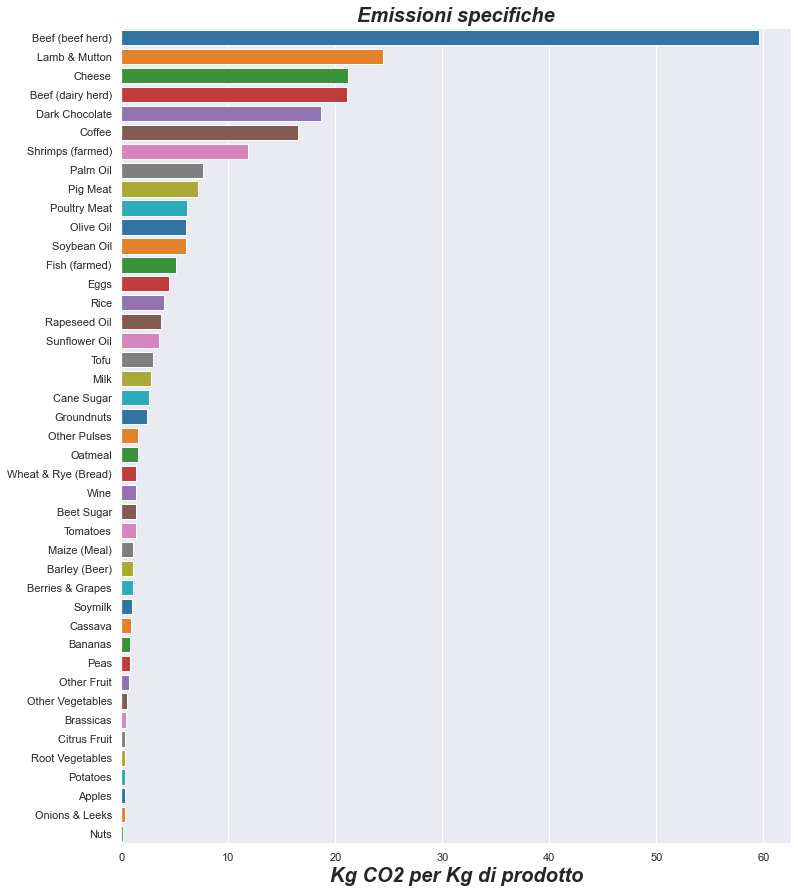

In [95]:
data = food_cycle.sort_values(['Total_emissions'], ascending=False)
sns.set(rc={"figure.figsize":(12, 15)})
ax = sns.barplot(x="Total_emissions", y="Food product", data=data, palette="tab10")

plt.title('Emissioni specifiche', size=20, fontstyle='italic', weight=900)
plt.ylabel('')
plt.xlabel('Kg CO2 per Kg di prodotto', size=20, fontstyle='italic', weight=900)

plt.show()

>Visualizziamo diversi tipi di inquinamento

In [35]:
product_pollution.dropna(axis=0, inplace=True)

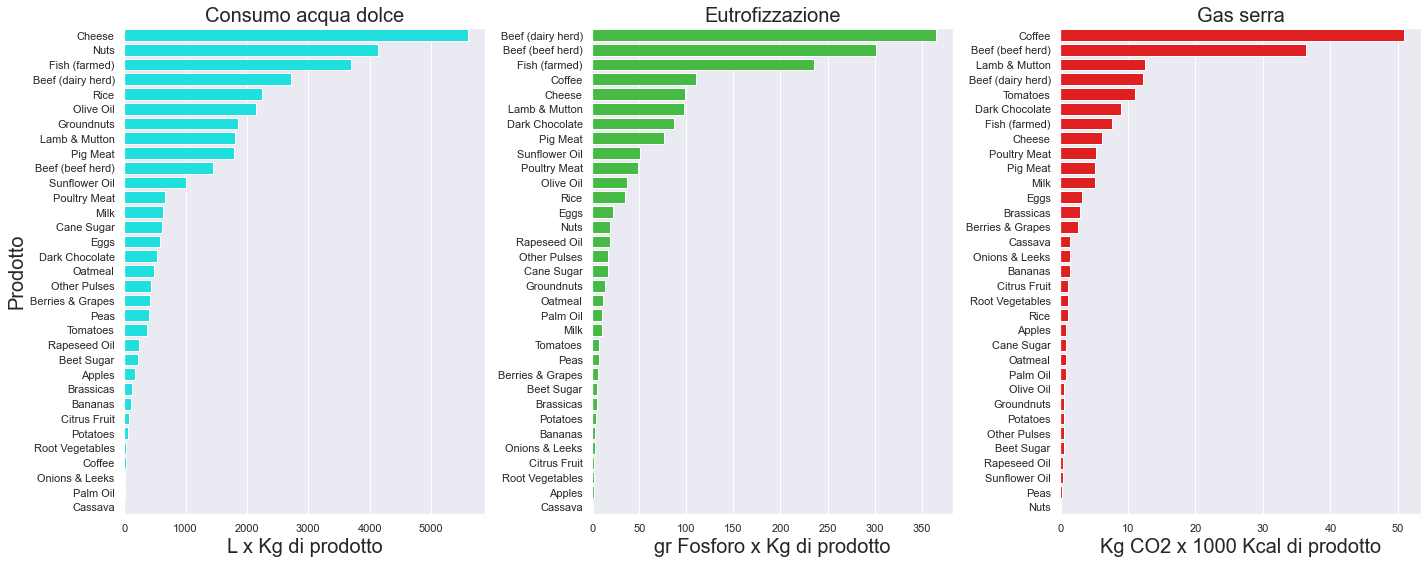

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,8))

data1 = product_pollution.sort_values(['Freshwater_per_kg'], ascending=False)
data2 = product_pollution.sort_values(['Eutro_per_kg'], ascending=False)
data3 = product_pollution.sort_values(['G_Gas_per_1000kcal'], ascending=False)

sns.barplot(ax=ax1, x='Freshwater_per_kg', y="Food product", color='aqua', data=data1)
sns.barplot(ax=ax2, x='Eutro_per_kg', y="Food product", color='limegreen', data=data2)
sns.barplot(ax=ax3, x='G_Gas_per_1000kcal', y="Food product", color='red', data=data3)

ax1.set_title('Consumo acqua dolce', size=20)
ax1.set_xlabel('L x Kg di prodotto', size=20)
ax1.set_ylabel('Prodotto', size=20)

ax2.set_title('Eutrofizzazione', size=20)
ax2.set_xlabel('gr Fosforo x Kg di prodotto', size=20)
ax2.set_ylabel('', size=20)

ax3.set_title("Gas serra", size=20)
ax3.set_xlabel('Kg CO2 x 1000 Kcal di prodotto', size=20)
ax3.set_ylabel('', size=20)

plt.tight_layout()
plt.show()

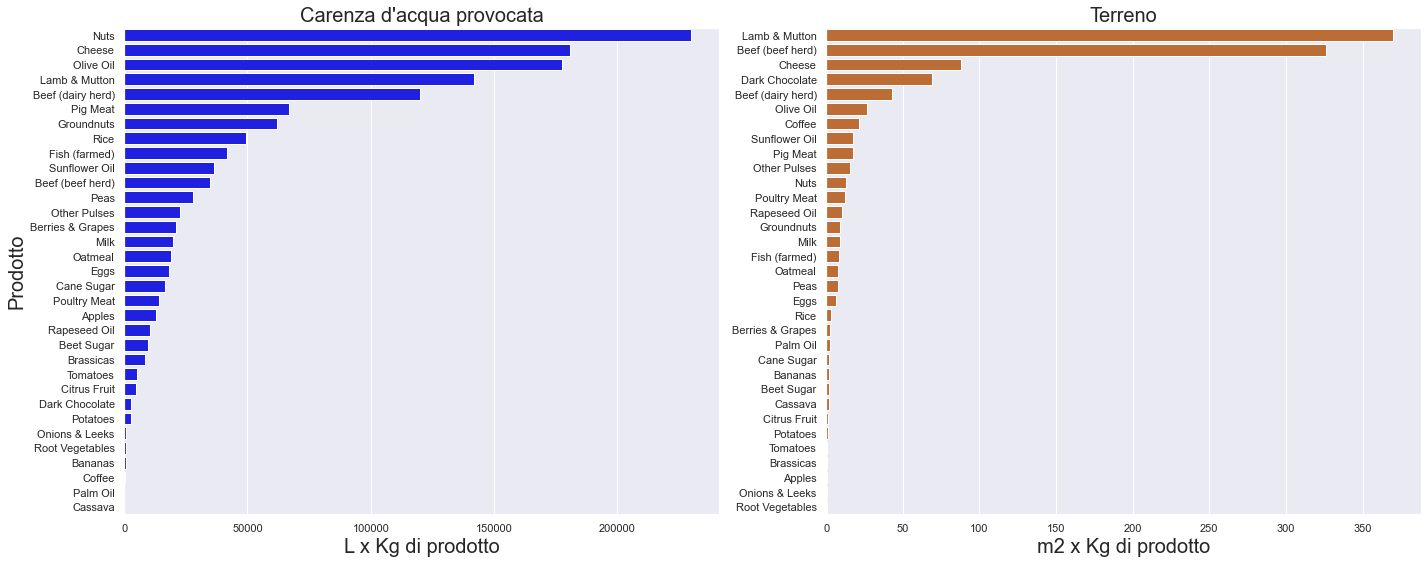

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

data1 = product_pollution.sort_values(['Scarcity_water_per_kg'], ascending=False)
data2 = product_pollution.sort_values(['Land_per_kg'], ascending=False)

sns.barplot(ax=ax1, x='Scarcity_water_per_kg', y="Food product", color='blue', data=data1)
sns.barplot(ax=ax2, x='Land_per_kg', y="Food product", color='chocolate', data=data2)

ax1.set_title("Carenza d'acqua provocata", size=20)
ax1.set_xlabel('L x Kg di prodotto', size=20)
ax1.set_ylabel('Prodotto', size=20)

ax2.set_title('Terreno', size=20)
ax2.set_xlabel('m2 x Kg di prodotto', size=20)
ax2.set_ylabel('', size=20)

plt.tight_layout()
plt.show()

>Gli alimenti di origine animale inquinano molto di più rispetto agli alimenti di origine vegetale. Il manzo è il primo della lista.<br>
>L'alimentazione vegana oltre ad apportare benefici all'organismo umano, giova anche all'ambiente, riducendo i gas serra prodotti dagli allevamenti di bestiame

>L'attenzione alle questioni ambientali sta aumentando, come evidenziato dall'interesse mondiale delle ricerche "vegan" su google<br>
><a href="https://trends.google.com/trends/explore?date=2010-01-01%202022-04-13&q=vegan">Link Google Trend</a>

In [38]:
vegan = pd.read_csv('./data/multiTimeline.csv', delimiter=";")

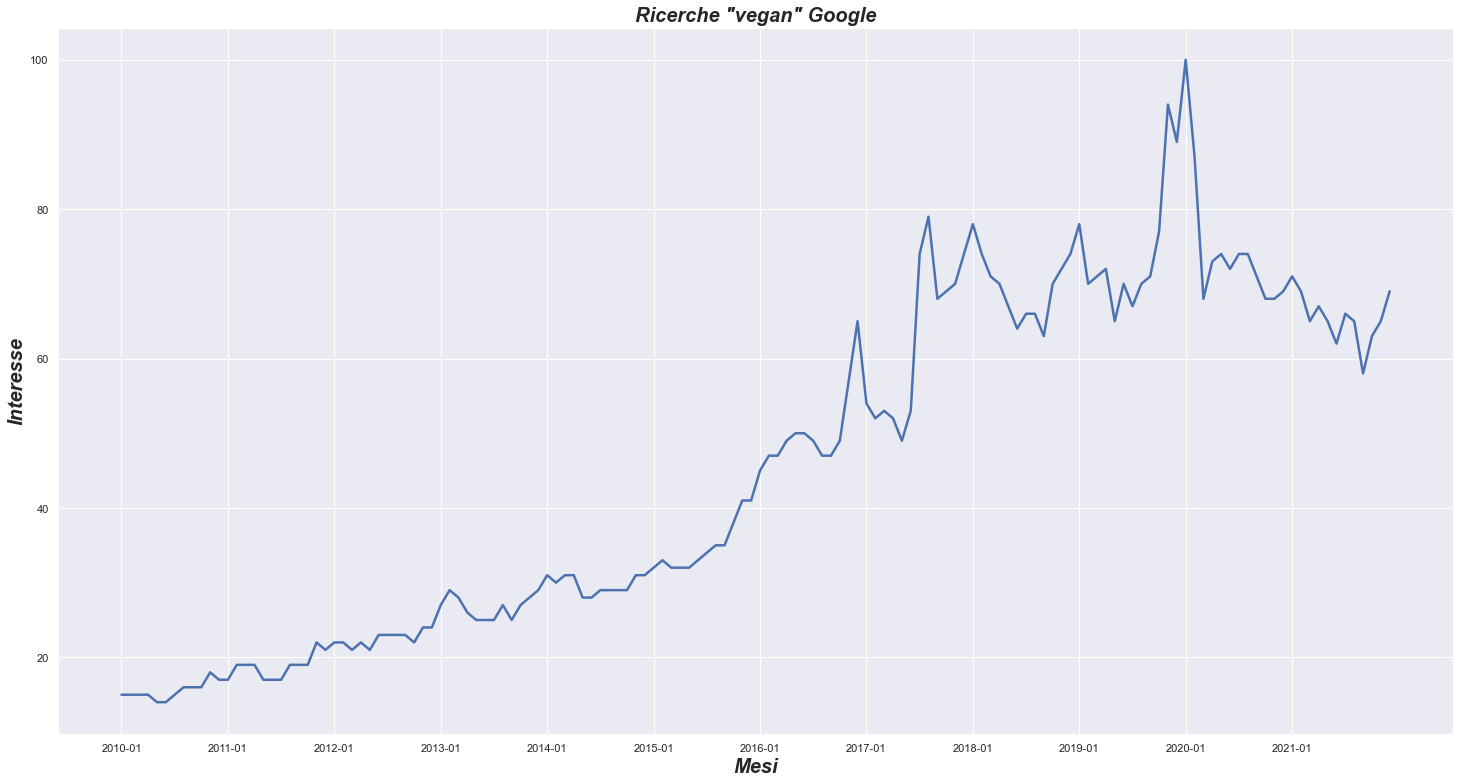

In [39]:
sns.set(rc={"figure.figsize":(25, 13)})
sns.lineplot(data=vegan, x='Month', y='Research', palette="tab10", linewidth=2.5)

plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01',])

plt.title('Ricerche "vegan" Google', size=20, fontstyle='italic', weight=900)
plt.xlabel('Mesi', size=20, fontstyle='italic', weight=900)
plt.ylabel('Interesse', size=20, fontstyle='italic', weight=900)

plt.show()

Se vogliamo preservare il pianeta anche per le prossime generazioni, è fondamentale passare ad un'alimentazione senza prodotti di origine animale. I primi a dare l'esempio devono essere i paesi più sviluppati.